In [1]:
import tensorflow as tf

from model_v2 import ModelV2
from data_loader import load_evaluation_data, TrainingDataLoader
from constants import assignments, x, y

In [2]:
sess = tf.InteractiveSession()

In [47]:
assignments['log_learning_rate'] = -1.
model = ModelV2(2)
sess.run(tf.global_variables_initializer())

In [67]:
training_loader = TrainingDataLoader(
  'localhost:5000',
  batch_size=25,
  image_size=100,
)

In [68]:
for _ in range(100):
    batch = training_loader.load_batch()
    loss = model.train_batch(sess, batch)
    print(loss)

0.083032
0.06172
0.111064
0.140716
0.151664
0.0939
0.126296
0.133648
0.121488
0.106988
0.101016
0.097436
0.129696
0.082708
0.087704
0.074104
0.082568
0.097456
0.065048
0.09458
0.1208
0.073508
0.091268
0.13128
0.087672
0.0752
0.100916
0.069256
0.103808
0.085112
0.055248
0.064836
0.073032
0.08826
0.085684
0.092704
0.099628
0.091936
0.065856
0.06426
0.111888
0.07158
0.113348
0.10444
0.066496
0.115524
0.080024
0.089972


KeyboardInterrupt: 

In [6]:
evaluation_data = load_evaluation_data(
  'localhost:5000'
)

In [36]:
def evaluate_model():
    count = 10
    x_eval, y_eval = evaluation_data
    n = 0
    total = 0.
    for i in range(0, len(x_eval), count):
        end = min(i + count, len(x_eval))
        spliced = x_eval[i:end], y_eval[i:end]
        total += model.evaluate(sess, spliced)
        n += 1
        print('average loss', total / n)
    return total / n

In [37]:
evaluate_model()

average loss 0.9992262125015259
average loss 0.9976198077201843
average loss 0.9975027044614156
average loss 0.9976206421852112
average loss 0.9967493295669556


KeyboardInterrupt: 

In [42]:
import matplotlib.pyplot as plt

In [69]:
x_eval, y_eval = batch
shape = x_eval.shape[1:3]
index = 0

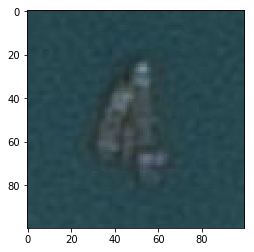

In [70]:
plt.imshow(x_eval[index])

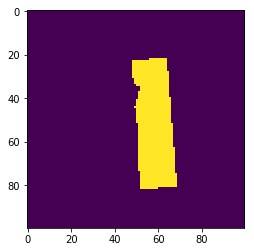

In [71]:
plt.imshow(y_eval[index].reshape(shape))

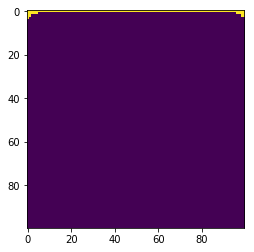

In [72]:
predicted = model.forward(sess, x_eval[index]).reshape((shape))
plt.imshow(predicted)

In [38]:
predicted.mean()

0.000100924364